# Housing Price Model

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as ms
# import seaborn as sns

In [86]:
data = pd.read_csv('Housing.csv')
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [87]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [88]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [89]:
## Data Preprocessing
# data = data.drop(['Unnamed: 0', 'furnishingstatus'], axis=1)
X = data.drop(['price'], axis=1) ## drop cols for axis 1
y = data['price']
# xx = data.iloc[:, 1:].values()
# yy = data.iloc[:, :-1].values()
# yyy = data.iloc[:, -1].values()




In [90]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [91]:
# data.drop_duplicates(inplace=True)
# data.dropna(inplace=True)
# data = data.dropna()

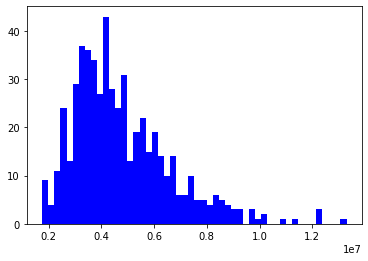

In [92]:
# plt.figure(figsize=(15, 6))
plt.hist(data['price'], bins=50, color='blue')
plt.show()

In [93]:
# data = data[data['price'] < 200000]

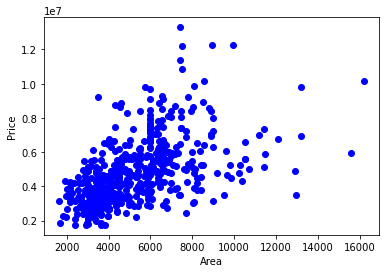

In [94]:
plt.scatter(data['area'], data['price'], color='blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [95]:
print(X.shape)

(545, 12)


In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4, 5, 6, 7, 8,10, 11])], remainder='passthrough')
X_trans = np.array(ct.fit_transform(X))


In [97]:
print(X_trans)

[[0. 1. 1. ... 2. 3. 2.]
 [0. 1. 1. ... 4. 4. 3.]
 [0. 1. 1. ... 2. 2. 2.]
 ...
 [0. 1. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 2. 0.]]


In [98]:
X_train, X_test, y_train, y_test = ms.train_test_split(X_trans, y, test_size=0.2)
# x_train, x_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
# print(model.coef_)
# print(model.intercept_)
print(y_pred)
print(y_test)

0.7440035812186255
[6907595.71 5707366.76 6562867.93 4235006.97 8218508.22 3282471.27
 5565303.4  5959571.26 7154690.31 6014160.64 2589763.07 3856564.76
 4386458.28 3769301.54 7474381.79 4014640.72 6153396.46 2070492.13
 6396744.7  3404056.19 6130327.18 8319602.49 5424622.32 4301308.73
 3396637.16 4090898.1  4944105.87 6753109.32 7311936.27 6653830.71
 5094438.63 4600498.11 6955744.75 3020783.38 4803428.16 4209400.21
 4752427.17 4562659.47 4436022.15 5837154.87 6504011.27 6555711.69
 5961753.55 3614831.72 5292524.64 8021460.54 3829443.29 4827345.04
 3843004.7  3248729.84 3558150.69 8125376.16 3416567.01 9016382.3
 8493374.17 6287283.69 3940415.67 3660491.98 2896561.33 3398840.89
 7416610.22 5083676.34 5071348.9  2608658.27 6515166.35 4259148.98
 4019455.34 6164186.83 3146551.83 3405294.33 6939338.14 2354796.11
 4415305.37 2864193.35 5705649.17 4386458.28 4022958.98 3543749.97
 7058096.14 2242402.42 4964083.47 3228829.98 4240119.08 4721514.68
 3388194.41 2931768.39 5147203.06 5041479.92

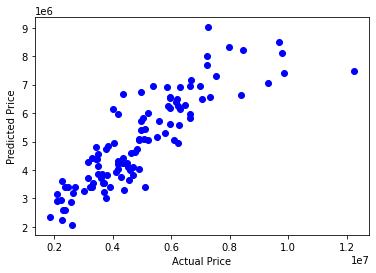

In [99]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

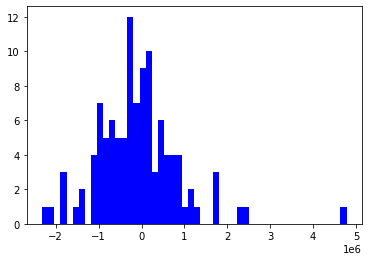

In [100]:
plt.hist(y_test - y_pred, bins=50, color='blue')
plt.show()


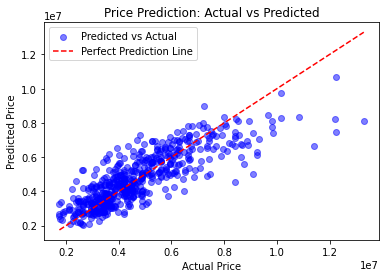

In [109]:
plt.scatter(y, model.predict(X_trans), color='blue', label='Predicted vs Actual', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Prediction: Actual vs Predicted')
plt.legend()
plt.show()

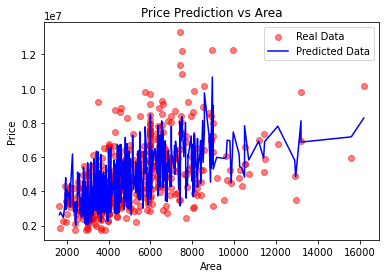

In [110]:
sorted_indices = np.argsort(X['area'])
X_area_sorted = X['area'].iloc[sorted_indices]
y_sorted = y.iloc[sorted_indices] if hasattr(y, 'iloc') else y[sorted_indices]
X_trans_sorted = X_trans[sorted_indices]  # Sort transformed data accordingly

# Scatter real data
plt.scatter(X_area_sorted, y_sorted, color='red', label='Real Data', alpha=0.5)
# Plot predicted data as a line
plt.plot(X_area_sorted, model.predict(X_trans_sorted), color='blue', label='Predicted Data')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price Prediction vs Area')
plt.legend()
plt.show()

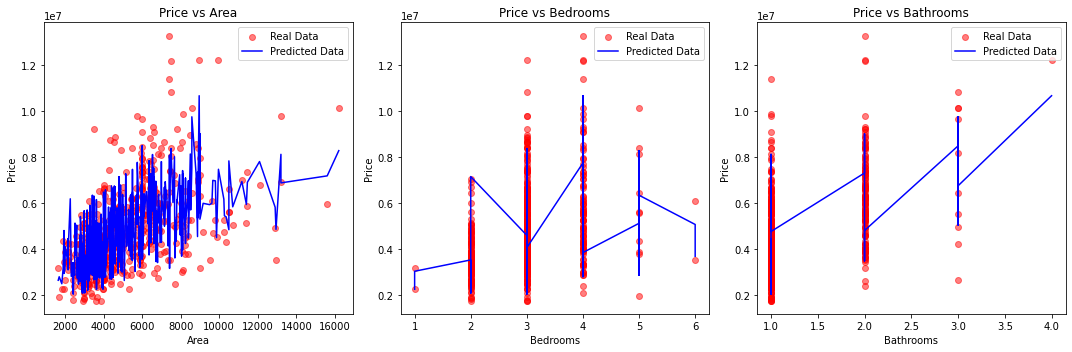

In [111]:
features = ['area', 'bedrooms', 'bathrooms']
fig, axes = plt.subplots(1, len(features), figsize=(15, 5))

for i, feature in enumerate(features):
    axes[i].scatter(X[feature], y, color='red', label='Real Data', alpha=0.5)
    # Sort for smooth prediction line
    sorted_indices = np.argsort(X[feature])
    X_feature_sorted = X[feature].iloc[sorted_indices]
    X_trans_sorted = X_trans[sorted_indices]
    axes[i].plot(X_feature_sorted, model.predict(X_trans_sorted), color='blue', label='Predicted Data')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Price')
    axes[i].set_title(f'Price vs {feature.capitalize()}')
    axes[i].legend()

plt.tight_layout()
plt.show()

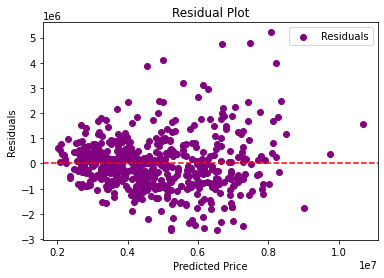

In [112]:
residuals = y - model.predict(X_trans)
plt.scatter(model.predict(X_trans), residuals, color='purple', label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()